In [80]:
from sklearn.model_selection import train_test_split


import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from tqdm.notebook import tqdm


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, r2_score,mean_squared_error



from xgboost import XGBClassifier

In [67]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ee3cb8d0>,
      dtype=object)

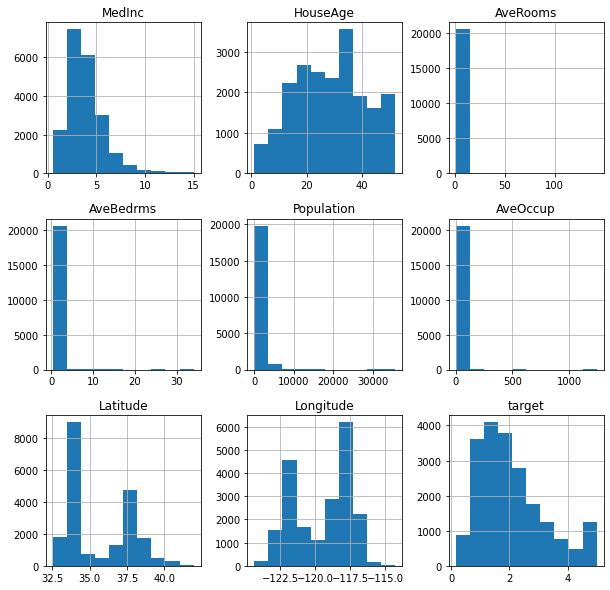

In [68]:
housing_df.hist(figsize=(10,10))

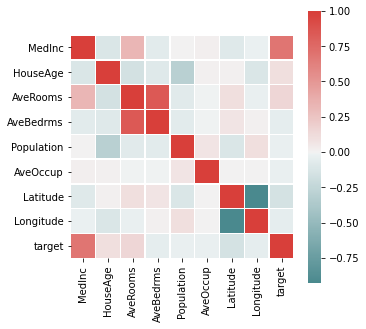

In [69]:
corr = housing_df.corr()
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(2000, 13, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0,square=True, linewidths=.5)

In [70]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [71]:
x = housing_df.drop('target', axis=1)
y = housing_df[['target']]

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2137)

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
decision_tree_model = DecisionTreeRegressor(criterion = "mse",random_state = 100)

In [75]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [78]:
def cal_accuracy(y_test, y_pred):
    print("r2_score : ", r2_score(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))

In [81]:
y_pred_DT = decision_tree_model.predict(x_test)
cal_accuracy(y_test, y_pred_DT)

r2_score :  0.6110880980038982
MSE : 0.5116253833156233


Feature: MedInc, 0, Score: 0.52029
Feature: HouseAge, 1, Score: 0.05206
Feature: AveRooms, 2, Score: 0.04678
Feature: AveBedrms, 3, Score: 0.02676
Feature: Population, 4, Score: 0.02982
Feature: AveOccup, 5, Score: 0.13137
Feature: Latitude, 6, Score: 0.09694
Feature: Longitude, 7, Score: 0.09598


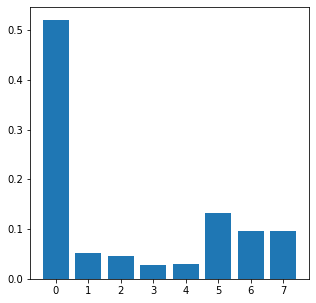

In [82]:
feature_columns = list(x_train.columns)
DT_importance = decision_tree_model.feature_importances_
for i,v in enumerate(DT_importance):
	print('Feature: %s, %0d, Score: %.5f' % (feature_columns[i], i,v))
# plot feature importance
plt.bar([x for x in range(len(DT_importance))], DT_importance)
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
LR_model = LinearRegression()

In [85]:
LR_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred = LR_model.predict(x_test)

In [87]:
cal_accuracy(y_test, y_pred)

r2_score :  0.5993984242150283
MSE : 0.5270035031478241


Feature: MedInc, Score: 0.43324
Feature: HouseAge, Score: 0.00910
Feature: AveRooms, Score: -0.10180
Feature: AveBedrms, Score: 0.58461
Feature: Population, Score: -0.00001
Feature: AveOccup, Score: -0.00339
Feature: Latitude, Score: -0.42006
Feature: Longitude, Score: -0.43296


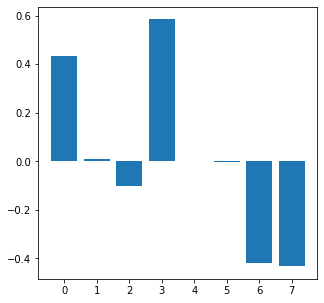

In [88]:
importance = LR_model.coef_

# summarize feature importance
for i,v in enumerate(importance[0]):
	print('Feature: %s, Score: %.5f' % (feature_columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

In [89]:
import xgboost as xgb

In [90]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

In [91]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [92]:
preds = xg_reg.predict(x_test)

In [93]:
cal_accuracy(y_test, preds)

r2_score :  0.7805210734700819
MSE : 0.28873117366486867


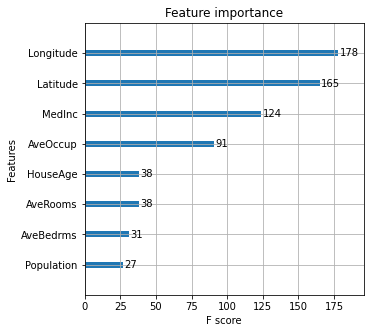

In [94]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()